In [4]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

In [3]:
n_obs = 10**6
pois_rv = sts.poisson(2)
x = pois_rv.rvs(n_obs)

In [4]:
ans1 = sum(x > 6)/n_obs

In [5]:
ans2 = sum(x > 6)/sum(x > 5)

In [6]:
x1 = x > 5
x2 = x < 7
d = x1 & x2

In [7]:
ans3 = sum(d)/10**6

In [8]:
ans4 = np.mean(x**3)

In [9]:
ans5 = np.mean(x[x>5])

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента подения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [10]:
!pip install tqdm

In [11]:
from tqdm.notebook import tqdm

In [33]:
def train_models():
    sum1 = 0
    sum2 = 0
    t1 = sts.uniform(1, 2).rvs(1)
    t2 = sts.uniform(1, 2).rvs(1)
    t = sts.expon(scale = 1/0.3).rvs(1)
    if (t1 > t and t > t2) or (t2 > t and t > t1):
        if t <= 1.5:
            sum1 += 1
        else:
            sum2 += 1
    return(sum1, sum2)

In [39]:
store = [train_models() for i in tqdm(range(10**5))]

In [ ]:
sum([train_models()[1] for i in tqdm(range(10**6))])

In [40]:
s1 = 0
s2 = 0
for i in range(len(store)):
    s1 += store[i][0]
    s2 += store[i][1]

In [41]:
ans6 = s1/(s1 + s2)

0.19397535371976266

In [23]:
1122/4005

0.2801498127340824

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = x^7    
[0, 1]
$$



In [5]:
uniform_rv = sts.uniform(0, 1)

n_obs = 10**6 
y = uniform_rv.rvs(n_obs)

In [6]:
x = y**(1/7)

In [7]:
x.mean()

0.8751286667838751

38.4558575793691

(array([4.80000e+01, 3.63000e+02, 1.70700e+03, 5.40600e+03, 1.53540e+04,
        3.48590e+04, 7.46460e+04, 1.45859e+05, 2.65110e+05, 4.56648e+05]),
 array([0.16549048, 0.24894143, 0.33239238, 0.41584333, 0.49929428,
        0.58274523, 0.66619619, 0.74964714, 0.83309809, 0.91654904,
        0.99999999]),
 <BarContainer object of 10 artists>)

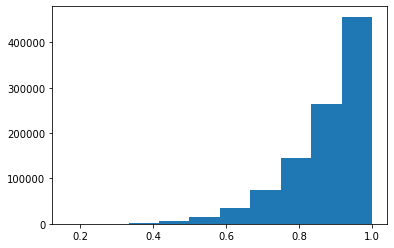

In [8]:
plt.hist(x)

1.9999999999999998